In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gasrari as GR
import scipy.optimize as opt

In [2]:
en_Ne=GR.energy("Ne")

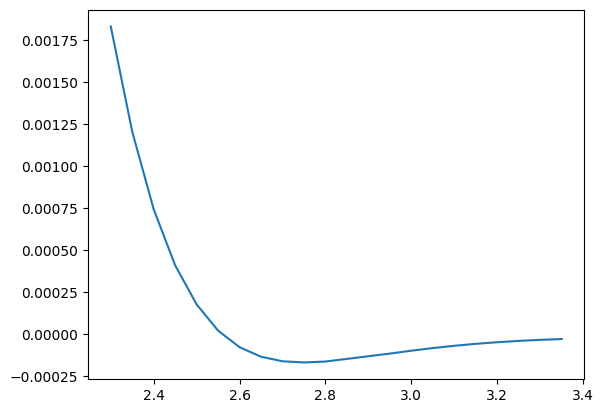

In [3]:
en_Ne2=GR.energy_2("Ne")
dist_Ne2=GR.distanze("Ne")
en_Ne2_corr=[x-2*en_Ne for x in en_Ne2]

plt.plot(dist_Ne2, en_Ne2_corr)

In [4]:
def V_morse(r, D, a, r0):
    er=np.exp(-a*(r-r0))
    return D*(er*er-2*er)

In [9]:
p_morse, covar = opt.curve_fit(V_morse, dist_Ne2, en_Ne2_corr, p0=[0.0001, 1.0, 2.7])

In [10]:
p_morse

array([1.48435292e-04, 3.17996133e+00, 2.78537637e+00])

In [11]:
en_sim=V_morse(dist_Ne2, *p_morse)

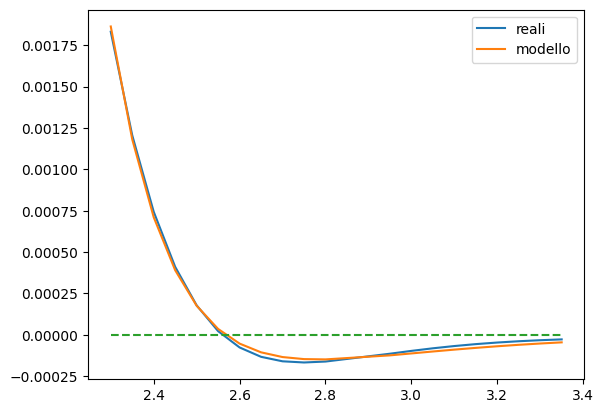

In [12]:
plt.plot(dist_Ne2, en_Ne2_corr, label="reali")
plt.plot(dist_Ne2, en_sim, label="modello")
plt.plot(dist_Ne2, en_sim*0, '--')
plt.legend();